In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.models import Sequential
%matplotlib inline

In [2]:
src_path = "Data/train1"
sub_class = os.listdir(src_path)

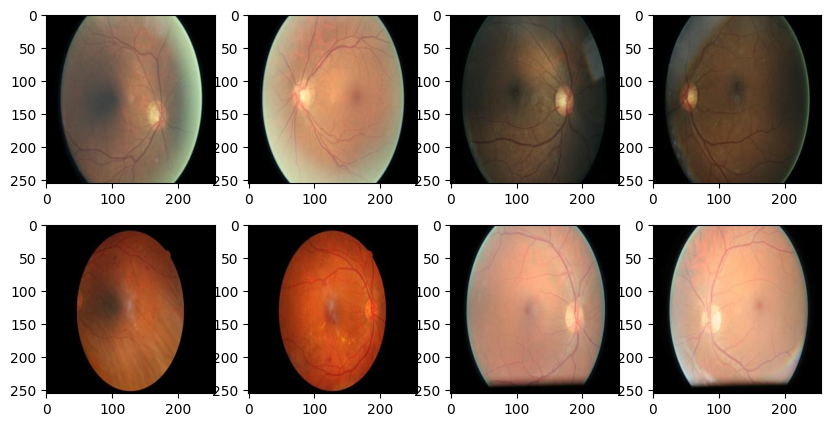

In [3]:
fig = plt.figure(figsize=(10,5))
for e in range(len(sub_class[:8])):
    plt.subplot(2,4,e+1)
    img = plt.imread(os.path.join(src_path,sub_class[e]))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

In [4]:
def append_ext(fn):
    return fn+".jpeg"

In [5]:
train_labels = pd.read_csv("trainLabels.csv",dtype=str)
train_labels['level'] = train_labels['level'].astype(str)
train_labels["image"]=train_labels["image"].apply(append_ext)
train_labels.head()

,image,level
0,10_left.jpeg,0
1,10_right.jpeg,0
2,13_left.jpeg,0
3,13_right.jpeg,0
4,15_left.jpeg,1


In [22]:
from keras_preprocessing.image import ImageDataGenerator
src_path_train = "Data/train1/"

train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

In [23]:
batch_size = 32
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_labels,
    directory=src_path_train,
    x_col="image",
    y_col="level",
    batch_size=batch_size,
    target_size=(256,256),
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)

Found 668 validated image filenames belonging to 5 classes.


C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:283: UserWarning: Found 34292 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


In [24]:
valid_generator = train_datagen.flow_from_dataframe(
    dataframe=train_labels,
    directory=src_path_train,
    x_col="image",
    y_col="level",
    batch_size=batch_size,
    target_size=(256,256),
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=42
)

Found 166 validated image filenames belonging to 5 classes.


C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:283: UserWarning: Found 34292 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


In [25]:
train_generator.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}

In [26]:
# train_generator.classes

In [27]:
len(train_generator)

21

In [28]:
from tensorflow.keras import models,layers
# resize_rescale = tf.keras.Sequential([
#     layers.experimental.preprocessing.Resizing(100,100),
#     layers.experimental.preprocessing.Rescaling(1.0/255)
# ])

In [29]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [31]:
input_shape = (100,100,3)
n_classes = 5

model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

In [32]:
# def prepare_model():
#     model = Sequential()
#     model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(256, 256, 3)))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Flatten())
#     model.add(Dense(16, activation='relu'))
#     model.add(Dense(5, activation='softmax'))
#     return model

In [15]:
model = prepare_model()

In [17]:
# model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [33]:
model.build((100,100,3))

In [34]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 10, 10, 64)      

In [38]:
history = model.fit(train_generator,
                    validation_data = valid_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=10)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/binary_crossentropy/logistic_loss/mul/BroadcastGradientArgs' defined at (most recent call last):
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelapp.py", line 728, in start
      self.io_loop.start()
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py", line 423, in do_execute
      res = shell.run_cell(
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2945, in run_cell
      result = self._run_cell(
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3000, in _run_cell
      return runner(coro)
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3203, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3382, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Aayush\AppData\Local\Temp\ipykernel_2908\3539870760.py", line 1, in <module>
      history = model.fit(train_generator,
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 526, in minimize
      grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "C:\Users\Aayush\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 259, in compute_gradients
      grads = tape.gradient(loss, var_list)
Node: 'gradient_tape/binary_crossentropy/logistic_loss/mul/BroadcastGradientArgs'
Incompatible shapes: [392,5] vs. [32,5]
	 [[{{node gradient_tape/binary_crossentropy/logistic_loss/mul/BroadcastGradientArgs}}]] [Op:__inference_train_function_2875]

In [ ]:
# model.compile(
#     optimizer='adam',
#     loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#     metrics=['accuracy']
# )
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])